# AdaBoost vs Decision Tree Classifier on Iris Dataset

This notebook compares the performance of a basic Decision Tree and an AdaBoost Classifier using the Iris dataset.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=1, random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

In [5]:
# AdaBoost Classifier with Decision Tree stumps
ab = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
ab.fit(X_train, y_train)
ab_preds = ab.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [6]:
# Evaluation: Decision Tree
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))

=== Decision Tree ===
Accuracy: 0.7111111111111111
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0 13  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.50      1.00      0.67        13
           2       0.00      0.00      0.00        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
# Evaluation: AdaBoost
print("\n=== AdaBoost ===")
print("Accuracy:", accuracy_score(y_test, ab_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, ab_preds))
print("Classification Report:\n", classification_report(y_test, ab_preds))


=== AdaBoost ===
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



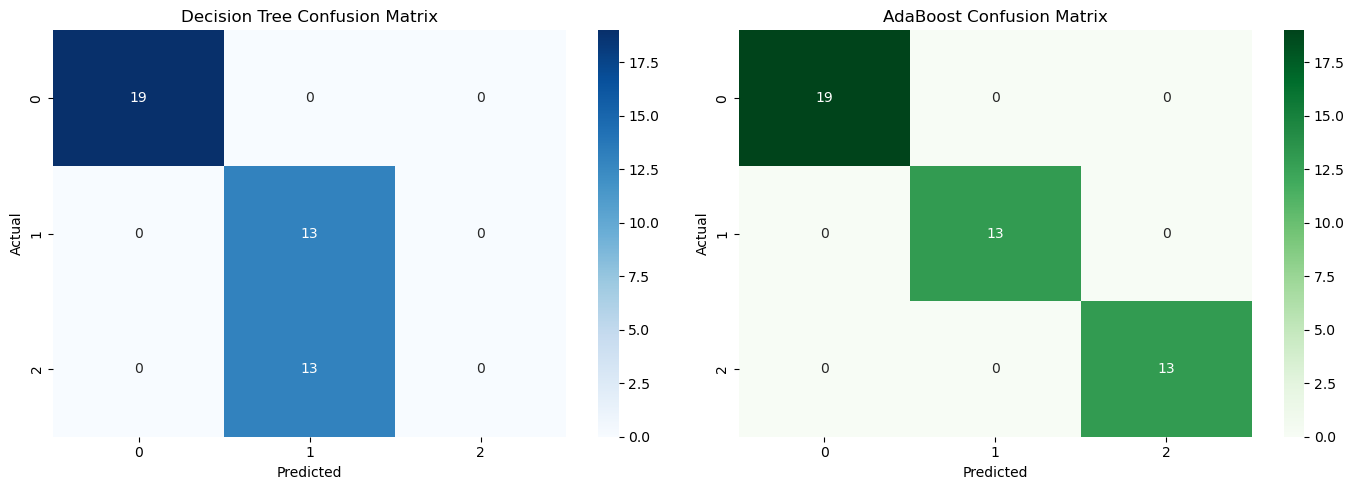

In [8]:
# Confusion Matrix Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, ab_preds), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("AdaBoost Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

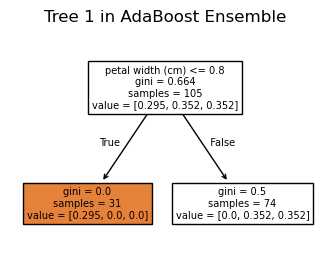

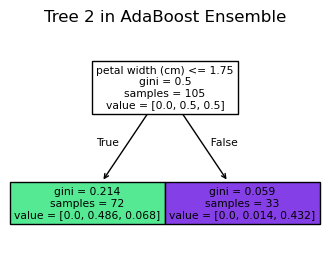

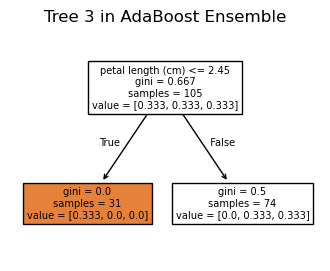

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def visualize_adaboost_trees(ab_model, feature_names=None, num_trees=3):
    """
    Visualizes the first few decision trees in an AdaBoost model.

    Parameters:
        ab_model: Trained AdaBoostClassifier object
        feature_names: List of feature names (optional)
        num_trees: Number of trees to visualize
    """
    for i, estimator in enumerate(ab_model.estimators_[:num_trees]):
        plt.figure(figsize=(4, 3))
        plot_tree(estimator, filled=True, feature_names=feature_names)
        plt.title(f"Tree {i + 1} in AdaBoost Ensemble")
        plt.show()
# Call this after training `ab`
visualize_adaboost_trees(ab, feature_names=iris.feature_names, num_trees=3)